# Get the Test Data 

In [1]:
import pandas as pd 

test_data = pd.read_csv("../datasets/attribute_set/test_data_fine_grained.csv", index_col=0)

In [2]:
test_data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img-001/img/Floral_Print_Sh...,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,../datasets/big_ds/img-001/img/Butterfly_Sleev...,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
2,../datasets/big_ds/img-001/img/Marled_Crochet-...,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,../datasets/big_ds/img-001/img/Sunburst_Print_...,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,../datasets/big_ds/img-001/img/Collared_Surpli...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Eval of Model 2: Efficient-Net 

In [4]:
import tensorflow as tf 

model_2_loaded = tf.keras.models.load_model("../trained_models/model_2_fine_grained_vgg.h5")

In [5]:
model_2_loaded.layers

In [6]:
from helpers import predict 

y_hats = predict(test_data.iloc[:, 0], model_2_loaded)

100 th iteration. You have 4000 inputs. 
200 th iteration. You have 4000 inputs. 
300 th iteration. You have 4000 inputs. 
400 th iteration. You have 4000 inputs. 
500 th iteration. You have 4000 inputs. 
600 th iteration. You have 4000 inputs. 
700 th iteration. You have 4000 inputs. 
800 th iteration. You have 4000 inputs. 
900 th iteration. You have 4000 inputs. 
1000 th iteration. You have 4000 inputs. 
1100 th iteration. You have 4000 inputs. 
1200 th iteration. You have 4000 inputs. 
1300 th iteration. You have 4000 inputs. 
1400 th iteration. You have 4000 inputs. 
1500 th iteration. You have 4000 inputs. 
1600 th iteration. You have 4000 inputs. 
1700 th iteration. You have 4000 inputs. 
1800 th iteration. You have 4000 inputs. 
1900 th iteration. You have 4000 inputs. 
2000 th iteration. You have 4000 inputs. 
2100 th iteration. You have 4000 inputs. 
2200 th iteration. You have 4000 inputs. 
2300 th iteration. You have 4000 inputs. 
2400 th iteration. You have 4000 inputs. 
2

In [7]:
import numpy as np 

y_hats = np.array(y_hats).squeeze()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(test_data.iloc[:, 1:].to_numpy(), y_hats, average="weighted")

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

base_threshold = 0.2
result_all_metrics = [] 
while base_threshold < 1:
    copy_y_hats = y_hats.copy() 
    copy_y_hats[copy_y_hats >= base_threshold] = 1
    copy_y_hats[copy_y_hats < base_threshold] = 0 

    result_all_metrics.append({
        "threshold": base_threshold, 
        "precision_weighted": round(precision_score(test_data.iloc[:, 1:].to_numpy(), copy_y_hats, average="weighted"),2),
        "recall_weighted": round(recall_score(test_data.iloc[:, 1:].to_numpy(), copy_y_hats, average="weighted"),2), 
        "f1_score_weighted": round(f1_score(test_data.iloc[:, 1:].to_numpy(), copy_y_hats, average="weighted"),2)
    })

    base_threshold = base_threshold + 0.025

result_all_metrics[0]


{'threshold': 0.2,
 'precision_weighted': 0.69,
 'recall_weighted': 0.91,
 'f1_score_weighted': 0.78}

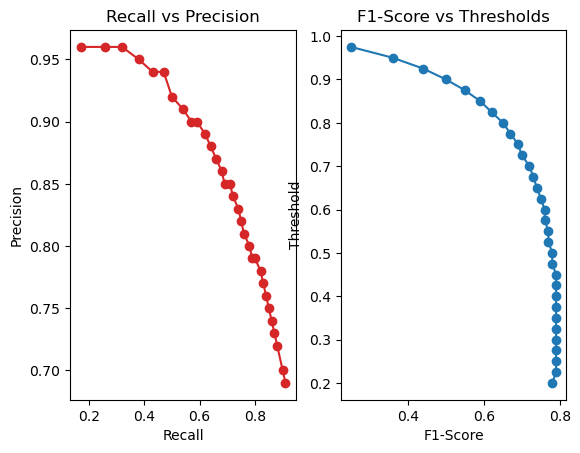

In [10]:
import matplotlib.pyplot as plt 
figure, axis = plt.subplots(1, 2)

recalls = [item["recall_weighted"] for item in result_all_metrics] 
precisions = [item["precision_weighted"] for item in result_all_metrics] 
f1_scores = [item["f1_score_weighted"] for item in result_all_metrics] 
thresh = [item["threshold"] for item in result_all_metrics]

axis[0].plot(recalls, precisions, '-o', c="#d62728")
axis[0].set_title("Recall vs Precision")
axis[0].set_xlabel("Recall")
axis[0].set_ylabel("Precision")

axis[1].plot(f1_scores, thresh, '-o')
axis[1].set_title("F1-Score vs Thresholds")
axis[1].set_xlabel("F1-Score")
axis[1].set_ylabel("Threshold")
plt.show()

In [12]:
from helpers import evaluate_img, show_image
threshold = 0.4 

1/1 [==============================] - 0s 104ms/step
floral             1.0
graphic            0.0
striped            0.0
embroidered        0.0
pleated            0.0
solid              1.0
lattice            0.0
long_sleeve        1.0
short_sleeve       0.0
sleeveless         0.0
maxi_length        0.0
mini_length        0.0
no_dress           1.0
crew_neckline      0.0
v_neckline         1.0
square_neckline    0.0
no_neckline        1.0
denim              1.0
chiffon            0.0
cotton             0.0
leather            0.0
faux               0.0
knit               0.0
tight              0.0
loose              0.0
conventional       1.0
dtype: float32


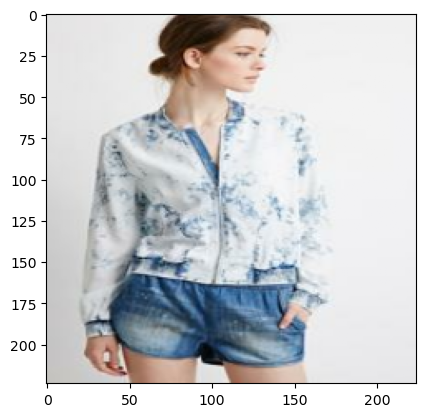

In [20]:
path = test_data[test_data.floral == 1].paths.tolist()[40]
print(evaluate_img(path, model=model_2_loaded, columns=list(test_data.columns[1:]), threshold=threshold))
show_image(path)

1/1 [==============================] - 0s 95ms/step
floral             0.0
graphic            0.0
striped            0.0
embroidered        0.0
pleated            0.0
solid              0.0
lattice            1.0
long_sleeve        1.0
short_sleeve       0.0
sleeveless         0.0
maxi_length        0.0
mini_length        0.0
no_dress           1.0
crew_neckline      0.0
v_neckline         1.0
square_neckline    0.0
no_neckline        0.0
denim              0.0
chiffon            0.0
cotton             1.0
leather            0.0
faux               0.0
knit               0.0
tight              0.0
loose              0.0
conventional       1.0
dtype: float32


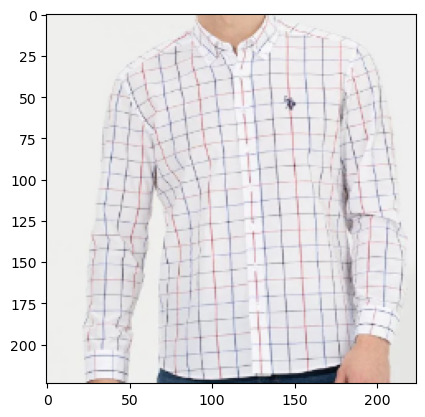

In [14]:
path = "../datasets/demos/uspa_sq2.PNG"
print(evaluate_img(path, model=model_2_loaded, columns=list(test_data.columns[1:]), threshold=threshold))
show_image(path)

1/1 [==============================] - 0s 73ms/step
floral             1.0
graphic            1.0
striped            0.0
embroidered        0.0
pleated            0.0
solid              0.0
lattice            0.0
long_sleeve        1.0
short_sleeve       0.0
sleeveless         0.0
maxi_length        0.0
mini_length        0.0
no_dress           1.0
crew_neckline      1.0
v_neckline         1.0
square_neckline    0.0
no_neckline        0.0
denim              0.0
chiffon            0.0
cotton             1.0
leather            0.0
faux               0.0
knit               0.0
tight              0.0
loose              0.0
conventional       1.0
dtype: float32


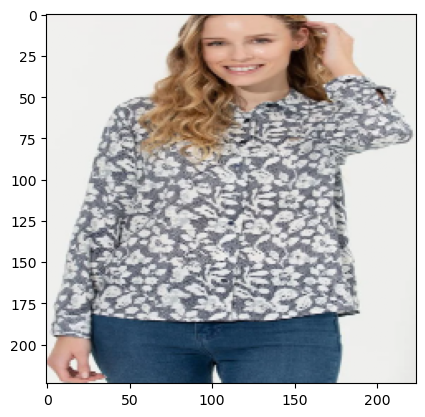

In [15]:
path = "../datasets/demos/floral.PNG"
print(evaluate_img(path, model=model_2_loaded, columns=list(test_data.columns[1:]), threshold=threshold))
show_image(path)